In [1]:
# working with mg spring system  with following knowns
# down is + 
# F_net = +mg - k (x-x0)
m = 2 # kg
k = 100 # N/m
g = 9.8 # N/kg
L = 0.50 # meters relaxed spring length from mount point
x_eq = m*g / k # equilibrium stretch from mount point/relaxed length
omega = (k/m)**0.5 # natural oscillation frequency

import math
import numpy as np
from scipy.integrate import solve_ivp

# for solve_ivp, this needs to be of the form:
# name(time, variables, args)
def dstate_dt(t, state, k, m, g, L): 
    x, v = state

    dx_dt = v
    dv_dt = (m*g - k*(x-L))/m # reminder, a = F/m
    
    return [dx_dt, dv_dt]
    
period = 2.0*math.pi/omega
tspan = [0,2*period]
x0 = L + 1.1*x_eq 
v0 = 0.0

solution = solve_ivp(
    dstate_dt, # derivative as function
    tspan,  # time interval to solve for
    [1.1*x_eq, 0], # initial values
    args=(k,m,g,L,) # why does this have to have a comma?  needs to be a "tuple"????
    , method="RK45"
)

# this was helpful for syntax 
# https://simulationbased.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/comment-page-1/


In [3]:
print(solution)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.144e-05 ...  1.708e+00  1.777e+00]
        y: [[ 2.156e-01  2.156e-01 ...  2.716e-01  2.156e-01]
            [ 0.000e+00  9.954e-04 ... -1.592e+00  1.346e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0


In [5]:
print(solution.t)
print(solution.y[0])
print(solution.y[1])


[0.00000000e+00 4.14397666e-05 4.55837433e-04 4.59981410e-03
 4.60395807e-02 1.59377497e-01 2.98331645e-01 4.43190406e-01
 5.84988009e-01 7.23694105e-01 8.66975130e-01 1.00999340e+00
 1.14424676e+00 1.28720556e+00 1.42908965e+00 1.56509430e+00
 1.70760244e+00 1.77715318e+00]
[0.2156     0.21560002 0.2156025  0.21585409 0.24083296 0.4897586
 0.9426263  1.17638115 0.95713661 0.50609391 0.22106032 0.38287447
 0.81000873 1.15201752 1.06841815 0.66005531 0.27164767 0.21561412]
[ 0.00000000e+00  9.95383181e-04  1.09491962e-02  1.10468055e-01
  1.08644033e+00  3.06787743e+00  2.91500803e+00  2.35633843e-02
 -2.85119354e+00 -3.12018259e+00 -5.10458803e-01  2.57618817e+00
  3.29982299e+00  1.06831602e+00 -2.14574118e+00 -3.38733686e+00
 -1.59217851e+00  1.34578918e-02]


Text(0.5, 0, 'time (seconds)')

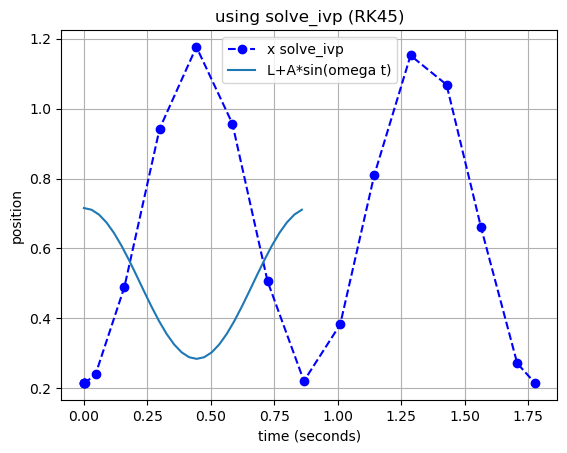

In [7]:
import matplotlib.pyplot as plt
plt.plot(solution.t,solution.y[0],label="x solve_ivp", linestyle='--', marker='o', color='b')
tvals=np.arange(0,period,period/30)
plt.plot(tvals,L+(x0-L)*np.cos(omega*tvals), label="L+A*sin(omega t)")
plt.grid()
plt.legend()
plt.title("using solve_ivp (RK45)")
plt.ylabel("position")
plt.xlabel("time (seconds)")